/tmp/ipykernel_19266/2986072297.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')
/tmp/ipykernel_19266/2986072297.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


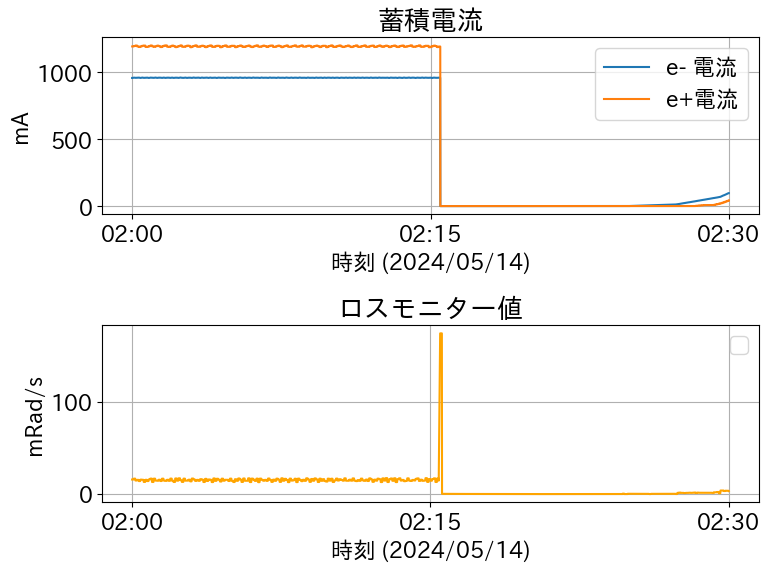

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib_fontja

# データを読み込み
df = pd.read_csv('JPSabort.csv')

# N/Aを前の値で埋める
df_filled = df.fillna(method='ffill')

# Timestamp列をdatetime型に変換
df_filled['Timestamp'] = pd.to_datetime(df_filled['Timestamp'])

# グラフ作成
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(8, 6))

# カスタムの時刻（2:00、2:15、2:30）を設定
custom_ticks = pd.to_datetime(['2024-05-14 02:00:00', 
                               '2024-05-14 02:15:00', 
                               '2024-05-14 02:30:00'])

# フォントサイズを16ポイントに設定
plt.rcParams.update({'font.size': 16})

# CURRENTのグラフ (グリッド付き)
ax1.plot(df_filled['Timestamp'], df_filled['BMHDCCT:CURRENT'], label='e- 電流')
ax1.plot(df_filled['Timestamp'], df_filled['BMLDCCT:CURRENT'], label='e+電流')
ax1.set_title('蓄積電流')
ax1.set_xlabel('時刻 (2024/05/14)')
ax1.set_ylabel('mA')
ax1.legend()
ax1.grid(True)

# カスタムの時刻（2:00、2:15、2:30）を設定
ax1.set_xticks(custom_ticks)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# DoseRateのグラフ (グリッド付き)
ax2.plot(df_filled['Timestamp'], df_filled['B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate'], color='orange')
ax2.set_title('ロスモニター値')
ax2.set_xlabel('時刻 (2024/05/14)')
ax2.set_ylabel('mRad/s')
ax2.legend()
ax2.grid(True)

# カスタムの時刻（2:00、2:15、2:30）を設定
ax2.set_xticks(custom_ticks)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.show()
